# 1.Importando librerias

In [12]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import os
from PIL import Image
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import load_img, img_to_array

# 2. Preprocesando imagenes

In [9]:
# Ruta de la carpeta que contiene las imágenes de neumonía
carpeta_neumonia = 'C:/Users/artur/Documents/Proyectos ML/PrediccionNeumonia/neumonia/xray_dataset_covid19/train/PNEUMONIA'

# Tamaño objetivo para redimensionar las imágenes
nuevo_ancho = 224
nuevo_alto = 224

# Recorre todas las imágenes en la carpeta de neumonía
for filename in os.listdir(carpeta_neumonia):
    if filename.endswith(".jpeg") or filename.endswith(".jpg") or filename.endswith(".png"):
        # Ruta completa de la imagen original
        ruta_original = os.path.join(carpeta_neumonia, filename)

        # Carga la imagen utilizando OpenCV
        imagen = cv2.imread(ruta_original)

        # Redimensiona la imagen
        imagen_redimensionada = cv2.resize(imagen, (nuevo_ancho, nuevo_alto))

        # Sobrescribe la imagen original con la imagen redimensionada
        cv2.imwrite(ruta_original, imagen_redimensionada)

In [12]:
# Ruta de la carpeta que contiene las imágenes normales
carpeta_normal = 'C:/Users/artur/Documents/Proyectos ML/PrediccionNeumonia/neumonia/xray_dataset_covid19/train/NORMAL'

# Tamaño objetivo para redimensionar las imágenes
nuevo_ancho = 224
nuevo_alto = 224

# Recorre todas las imágenes en la carpeta de neumonía
for filename in os.listdir(carpeta_normal):
    if filename.endswith(".jpeg") or filename.endswith(".jpg") or filename.endswith(".png"):
        # Ruta completa de la imagen original
        ruta_original = os.path.join(carpeta_normal, filename)

        # Carga la imagen utilizando OpenCV
        imagen = cv2.imread(ruta_original)

        # Redimensiona la imagen
        imagen_redimensionada = cv2.resize(imagen, (nuevo_ancho, nuevo_alto))

        # Sobrescribe la imagen original con la imagen redimensionada
        cv2.imwrite(ruta_original, imagen_redimensionada)

In [13]:
# Ruta de la carpeta que contiene las imágenes de neumonía
carpeta_neumonia_test = 'C:/Users/artur/Documents/Proyectos ML/PrediccionNeumonia/neumonia/xray_dataset_covid19/test/PNEUMONIA'

# Tamaño objetivo para redimensionar las imágenes
nuevo_ancho = 224
nuevo_alto = 224

# Recorre todas las imágenes en la carpeta de neumonía
for filename in os.listdir(carpeta_neumonia_test):
    if filename.endswith(".jpeg") or filename.endswith(".jpg") or filename.endswith(".png"):
        # Ruta completa de la imagen original
        ruta_original = os.path.join(carpeta_neumonia_test, filename)

        # Carga la imagen utilizando OpenCV
        imagen = cv2.imread(ruta_original)

        # Redimensiona la imagen
        imagen_redimensionada = cv2.resize(imagen, (nuevo_ancho, nuevo_alto))

        # Sobrescribe la imagen original con la imagen redimensionada
        cv2.imwrite(ruta_original, imagen_redimensionada)

In [15]:
# Ruta de la carpeta que contiene las imágenes de neumonía
carpeta_normal_test= 'C:/Users/artur/Documents/Proyectos ML/PrediccionNeumonia/neumonia/xray_dataset_covid19/test/NORMAL'

# Tamaño objetivo para redimensionar las imágenes
nuevo_ancho = 224
nuevo_alto = 224

# Recorre todas las imágenes en la carpeta de neumonía
for filename in os.listdir(carpeta_normal_test):
    if filename.endswith(".jpeg") or filename.endswith(".jpg") or filename.endswith(".png"):
        # Ruta completa de la imagen original
        ruta_original = os.path.join(carpeta_normal_test, filename)

        # Carga la imagen utilizando OpenCV
        imagen = cv2.imread(ruta_original)

        # Redimensiona la imagen
        imagen_redimensionada = cv2.resize(imagen, (nuevo_ancho, nuevo_alto))

        # Sobrescribe la imagen original con la imagen redimensionada
        cv2.imwrite(ruta_original, imagen_redimensionada)

# 3.Definir el modelo

In [2]:
# Definir la arquitectura del modelo
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compilar el modelo
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Imprimir un resumen de la arquitectura del modelo
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 26, 26, 128)      0

In [3]:
# Directorios de los conjuntos de entrenamiento y prueba
train_directory = 'C:/Users/artur/Documents/Proyectos ML/PrediccionNeumonia/neumonia/xray_dataset_covid19/train'
test_directory = 'C:/Users/artur/Documents/Proyectos ML/PrediccionNeumonia/neumonia/xray_dataset_covid19/test'

# Normalización de los valores de píxeles (escala de 0 a 1)
train_datagen = ImageDataGenerator(rescale=1.0/255.0)
test_datagen = ImageDataGenerator(rescale=1.0/255.0)

# Carga y preparación de los datos de entrenamiento
train_generator = train_datagen.flow_from_directory(
    train_directory,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    classes=['NORMAL', 'PNEUMONIA']
)

# Carga y preparación de los datos de prueba
test_generator = test_datagen.flow_from_directory(
    test_directory,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    classes=['NORMAL', 'PNEUMONIA']
)



Found 148 images belonging to 2 classes.
Found 40 images belonging to 2 classes.


# 4. Entrenar el modelo

In [4]:
model.fit_generator(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=50
)


C:\Users\artur\AppData\Local\Temp\ipykernel_5112\4036033017.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(


Epoch 1/50
5/5 [==============================] - 5s 832ms/step - loss: 0.8491 - accuracy: 0.5135
Epoch 2/50
5/5 [==============================] - 4s 900ms/step - loss: 0.6531 - accuracy: 0.5473
Epoch 3/50
5/5 [==============================] - 5s 897ms/step - loss: 0.5056 - accuracy: 0.7635
Epoch 4/50
5/5 [==============================] - 5s 882ms/step - loss: 0.3671 - accuracy: 0.8243
Epoch 5/50
5/5 [==============================] - 4s 776ms/step - loss: 0.1882 - accuracy: 0.9257
Epoch 6/50
5/5 [==============================] - 4s 767ms/step - loss: 0.1684 - accuracy: 0.9459
Epoch 7/50
5/5 [==============================] - 4s 767ms/step - loss: 0.0769 - accuracy: 0.9595
Epoch 8/50
5/5 [==============================] - 4s 781ms/step - loss: 0.1762 - accuracy: 0.9054
Epoch 9/50
5/5 [==============================] - 4s 780ms/step - loss: 0.0688 - accuracy: 0.9797
Epoch 10/50
5/5 [==============================] - 4s 780ms/step - loss: 0.0689 - accuracy: 0.9730
Epoch 11/50
5/5 [==

In [5]:
loss, accuracy = model.evaluate_generator(test_generator)
print("Loss:", loss)
print("Accuracy:", accuracy)


C:\Users\artur\AppData\Local\Temp\ipykernel_5112\438586377.py:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  loss, accuracy = model.evaluate_generator(test_generator)


Loss: 0.00011615008406806737
Accuracy: 1.0


# 5. Probando el modelo

1/1 [==============================] - 0s 31ms/step


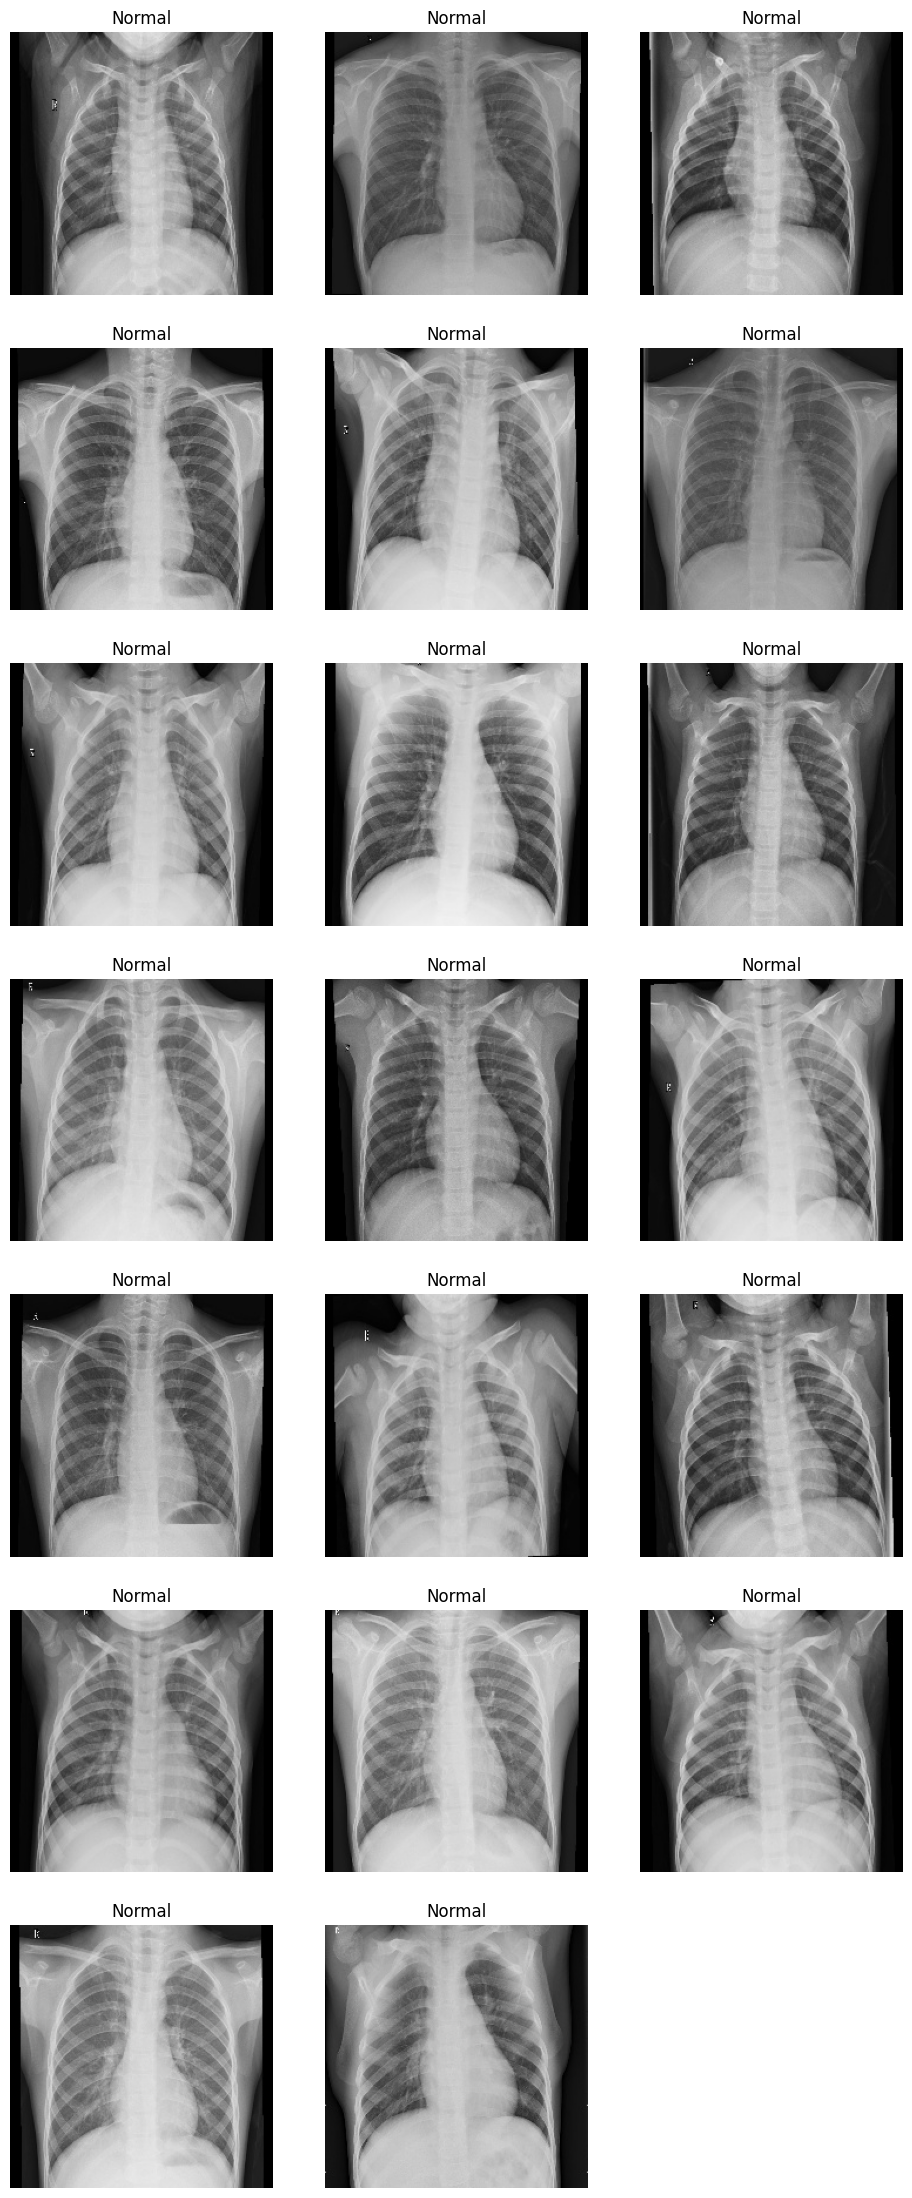

In [27]:
# Obtener la lista de archivos en la carpeta "NORMAL"
normal_folder = os.path.join(test_directory, "NORMAL")
normal_files = os.listdir(normal_folder)

# Configurar el tamaño y la disposición de los subplots
num_images = len(normal_files)
num_cols = min(3, num_images)
num_rows = (num_images - 1) // num_cols + 1
fig, axs = plt.subplots(num_rows, num_cols, figsize=(12, num_rows * 4))

# Recorrer los archivos de la carpeta "NORMAL"
for i, file in enumerate(normal_files):
    img_path = os.path.join(normal_folder, file)
    img = load_img(img_path, target_size=(224, 224))
    img_array = img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0
    
    # Predecir la clase de la imagen
    prediction = model.predict(img_array)
    if prediction < 0.5:
        prediction_label = "Normal"
    else:
        prediction_label = "Neumonía"
    
    # Calcular las coordenadas del subplot
    row_idx = i // num_cols
    col_idx = i % num_cols
    
    # Mostrar la imagen y la etiqueta en el subplot correspondiente
    axs[row_idx, col_idx].imshow(img)
    axs[row_idx, col_idx].set_title(prediction_label)
    axs[row_idx, col_idx].axis('off')

# Eliminar subplots vacíos en la última fila
if num_images % num_cols != 0:
    for i in range(num_images % num_cols, num_cols):
        fig.delaxes(axs[num_rows-1, i])

# Ajustar el espaciado entre subplots
plt.subplots_adjust(wspace=0.05, hspace=0.2)

# Mostrar la figura con los subplots
plt.show()

1/1 [==============================] - 0s 35ms/step


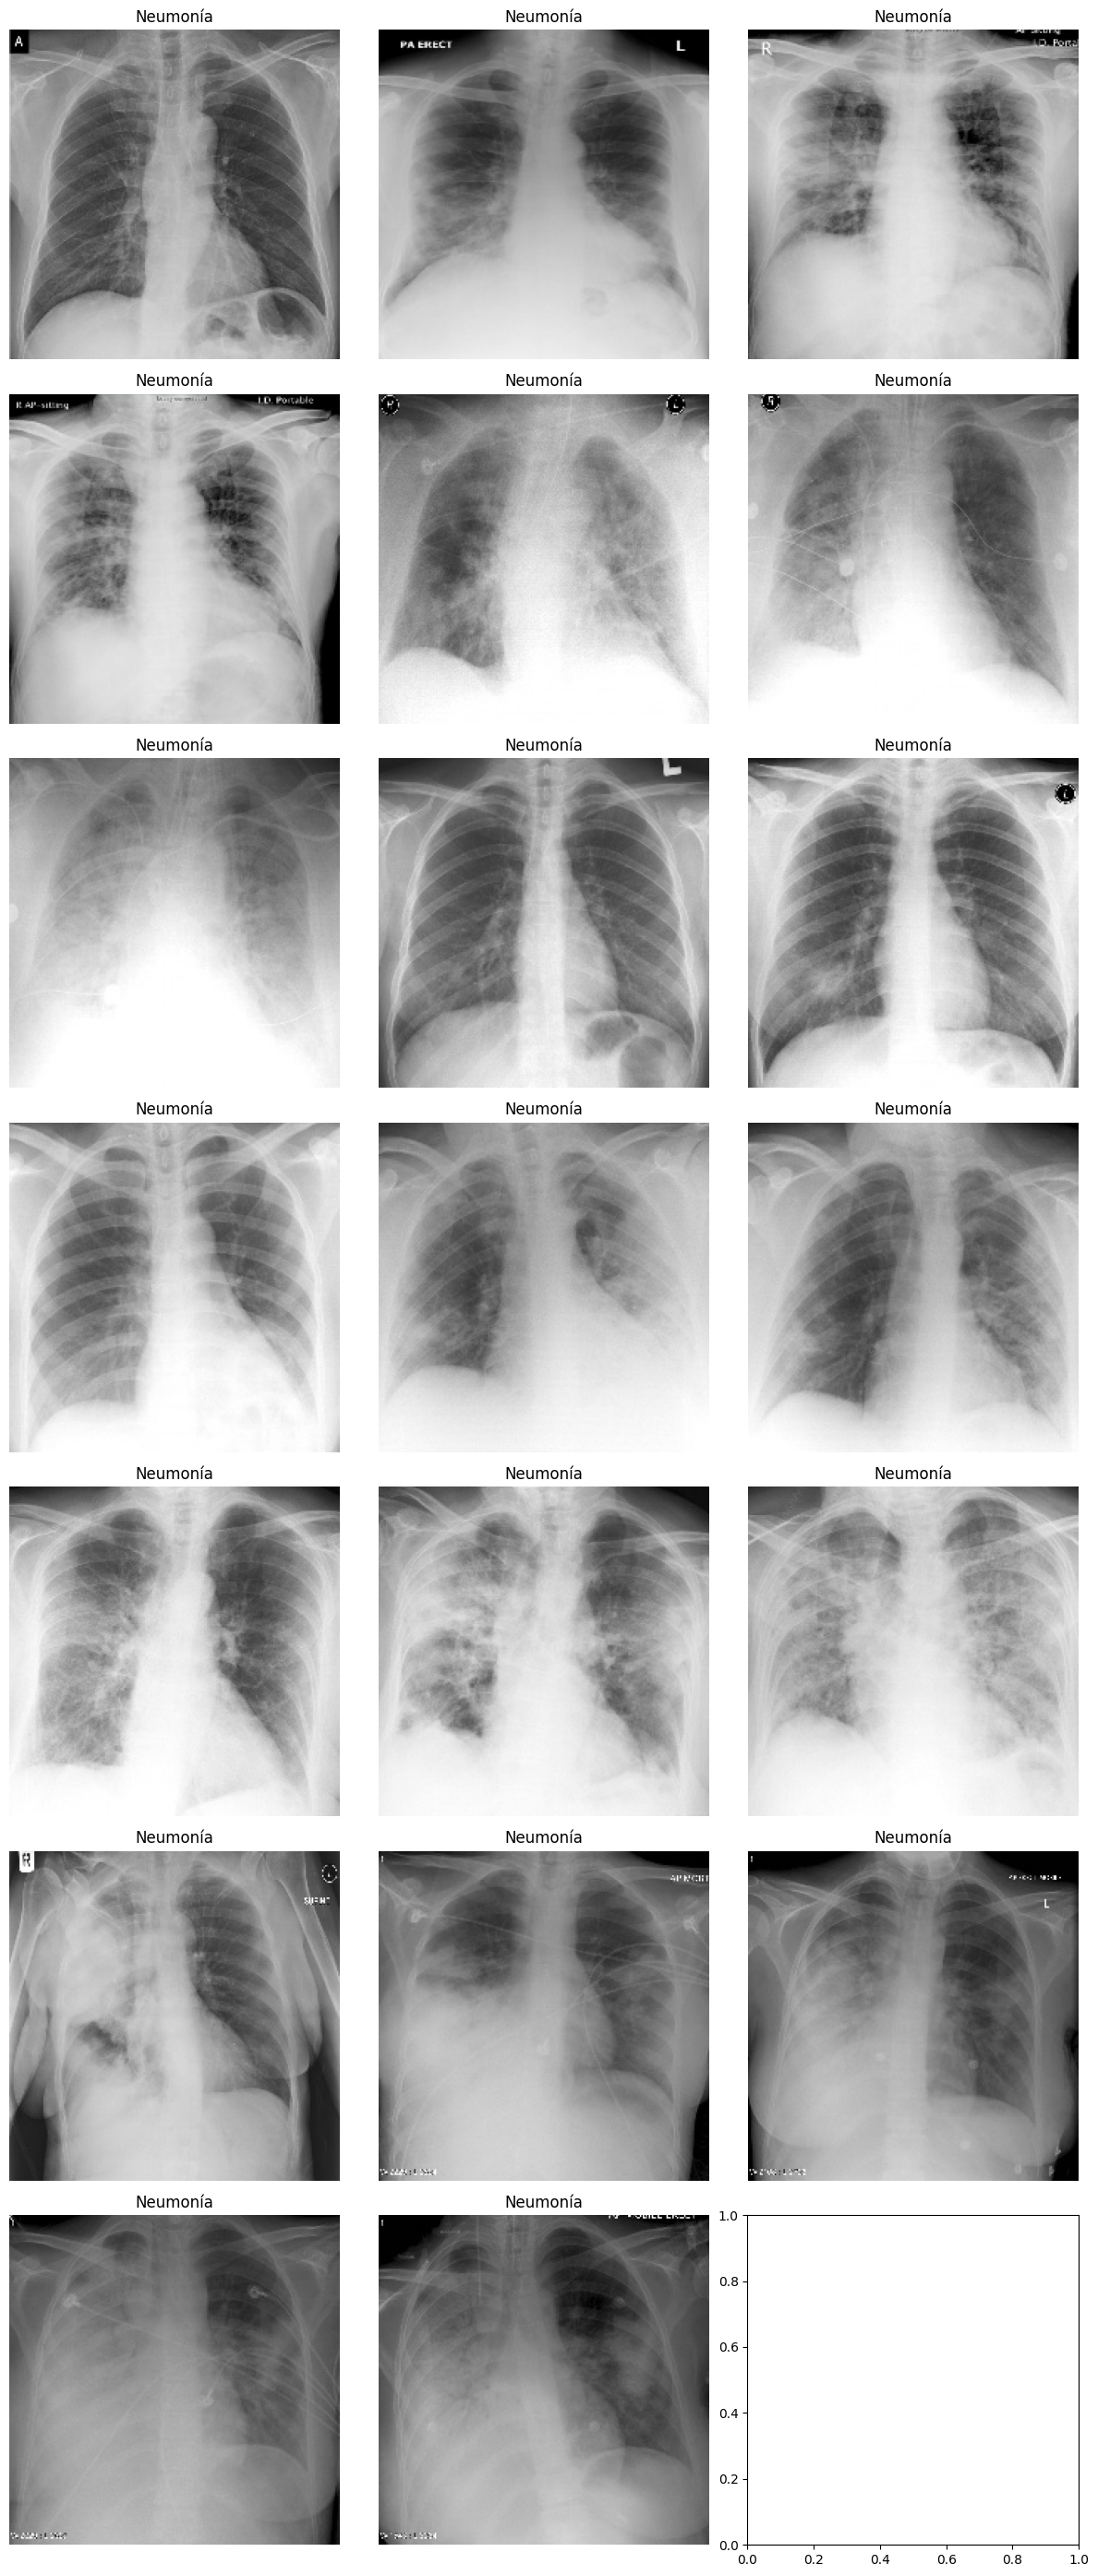

In [25]:
# Obtener la lista de archivos en la carpeta "NEUMONIA"
neumonia_folder = os.path.join(test_directory, "PNEUMONIA")
neumonia_files = os.listdir(neumonia_folder)


# Configurar el tamaño y la disposición de los subplots
num_images = len(neumonia_files)
num_rows = (num_images - 1) // 3 + 1
num_cols = min(3, num_images)
fig, axs = plt.subplots(num_rows, num_cols, figsize=(12, num_rows * 4))

# Recorrer los archivos de la carpeta "NORMAL"
for i, file in enumerate(neumonia_files):
    img_path = os.path.join(neumonia_folder, file)
    img = load_img(img_path, target_size=(224, 224))
    img_array = img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0
    
    # Predecir la clase de la imagen
    prediction = model.predict(img_array)
    if prediction < 0.5:
        prediction_label = "Normal"
    else:
        prediction_label = "Neumonía"
    
    # Calcular las coordenadas del subplot
    row_idx = i // num_cols
    col_idx = i % num_cols
    
    # Mostrar la imagen y la etiqueta en el subplot correspondiente
    axs[row_idx, col_idx].imshow(img)
    axs[row_idx, col_idx].set_title(prediction_label)
    axs[row_idx, col_idx].axis('off')

# Eliminar subplots vacíos en la última fila
if num_images % num_cols != 0:
    for i in range(num_images % num_cols, num_cols):
        fig.delaxes(axs[num_rows-1, i])

# Ajustar el espaciado entre subplots
plt.subplots_adjust(wspace=0.05, hspace=0.2)

# Mostrar la figura con los subplots
plt.show()